In [1]:
import tensorflow as tf                    #Machine Learning Library
import matplotlib.pyplot as plt            #Display the images for verification
import numpy as np                         #Mathematical and arrays library
from scipy import misc                     #Image Importing module
from skimage.transform import resize       #Resizing image module
from sklearn.utils import shuffle          #Shuffle in random order module
import glob                                #Iterating through all pictures library

In [2]:
#learning_rate = 0.001
learning_rate = 0.000001
#training_epochs = 15
training_epochs = 9
batch_size = 5
n_classes = 3
#n_samples = 9000
n_samples = 1000
n_input = 396
n_hidden_1 = 256
n_hidden_2 = 256

def multilayer_perceptron(x, weights,biases):
    '''
    x: Placeholder for Data Input
    weights: Dict of weights
    biases: dict of bias values
    '''
    
    ### First Hidden Layer with RELU Activation Function
    # X * W + B
    layer_1 = tf.add(tf.matmul(x,weights['h1']),biases['b1'])
    # RELU(X * W + B) -> f(x) = max(0,x)
    layer_1 = tf.nn.relu(layer_1)
    
    ### Second Hidden Layer
    # X * W + B
    layer_2 = tf.add(tf.matmul(layer_1,weights['h2']),biases['b2'])
    # RELU(X * W + B) -> f(x) = max(0,x)
    layer_2 = tf.nn.relu(layer_2)
    
    ### Last Output Layer
    out_layer = tf.matmul(layer_2,weights['out']) + biases['out']
    
    return out_layer

#Creating the weights dictionary
'''
    h1 - martix of randomly assigned values from a normal distribution. rows=784, columns=256
    h2 - martix of randomly assigned values from a normal distribution. rows=256, columns=256
    out - matric of randomly assigned values from a normal distribution. rows=256, columns=10
'''
weights = {
    'h1':tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2':tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_hidden_2,n_classes]))
}

biases = {
    'b1':tf.Variable(tf.random_normal([n_hidden_1])),
    'b2':tf.Variable(tf.random_normal([n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_classes])) 
}

x = tf.placeholder('float', [None, 396])
y = tf.placeholder('float',[None,10])

pred = multilayer_perceptron(x,weights,biases)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred,labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

def weightedAverage(pixel):
    return 0.299*pixel[0] + 0.587*pixel[1] + 0.114*pixel[2]

(144, 176)
(18, 22)


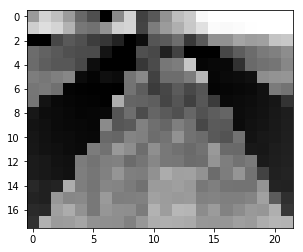

In [3]:
init = tf.global_variables_initializer()
image = misc.imread('/Users/hannansaleemi/greyforward.png')
print(image.shape)
newimg = resize(image, (18,22), mode='reflect')

print(newimg.shape)
            
plt.imshow(newimg, cmap='Greys')
plt.show()

newimg = newimg.reshape(1,396)


#draw_img = newimg.reshape(1,396)
#2 = right
#1 = left
#0 = forward

In [4]:
with tf.Session() as sess:
    sess.run(init)
    saver = tf.train.Saver()
    saver.restore(sess, "/Users/hannansaleemi/model.ckpt")
    print("Model Restored")
    result = sess.run(tf.argmax(pred, 1), feed_dict={x: newimg})

INFO:tensorflow:Restoring parameters from /Users/hannansaleemi/model.ckpt
Model Restored


In [5]:
result #0 - forward     1 - left     2 - right

array([0])